In [25]:
"""
Created on Tue Nov 27 19:35:26 2020

@author: Armando Alvarez Rolins

Title: A comparison between Covid cases and UV index

Description: This notebook attempts to verify a relationship between reported COVID-19 cases and UV index in a given location
"""
# Linear Algebra and Data Processing
import numpy as np
import pandas as pd
import requests
import os
import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [26]:
# Reading the COVID-19 Cities data to a dataframe format
df_covid19_cities = pd.read_csv('./brazil_covid19_cities.csv')
data_inicial = df_covid19_cities['date'].iloc[0]
data_final = df_covid19_cities['date'].iloc[-1]
df_sjk = df_covid19_cities.loc[df_covid19_cities['name'] == 'São José dos Campos']
df_sjk['date'] = pd.to_datetime(df_sjk['date'])
df_sjk.set_index('date', inplace=True)
print(df_sjk)

# Reading NASA POWER (Prediction of Worldwide Energy Resources) data
df_insolation = pd.read_csv('./SJK_insolation.csv')
df_insolation = df_insolation.rename(columns = {'YEAR': 'year', 'MO': 'month', 'DY': 'day'})
df_insolation['date'] = pd.to_datetime(df_insolation[['year', 'month', 'day']])
df_insolation.set_index('date', inplace=True)
df_insolation_cropped = df_insolation.loc[data_inicial:data_final]
print(df_insolation_cropped)

           state                 name      code  cases  deaths
date                                                          
2020-03-27    SP  São José dos Campos  354990.0      0       0
2020-03-28    SP  São José dos Campos  354990.0      4       0
2020-03-29    SP  São José dos Campos  354990.0      4       0
2020-03-30    SP  São José dos Campos  354990.0      5       0
2020-03-31    SP  São José dos Campos  354990.0      9       0
...          ...                  ...       ...    ...     ...
2020-11-23    SP  São José dos Campos  354990.0  20429     488
2020-11-24    SP  São José dos Campos  354990.0  20493     490
2020-11-25    SP  São José dos Campos  354990.0  20633     490
2020-11-26    SP  São José dos Campos  354990.0  20694     491
2020-11-27    SP  São José dos Campos  354990.0  20725     491

[246 rows x 5 columns]
                 LAT       LON  year  month  day  ALLSKY_SFC_SW_DWN
date                                                               
2020-03-27 -23.22799 

In [27]:
# Concatenating the important information into a new dataframe
df_insolation_covid = pd.concat([df_sjk[['cases', 'deaths']], df_insolation_cropped['ALLSKY_SFC_SW_DWN']], axis=1)
print(df_insolation_covid)

# Feature Engineering - Handling Outliers
df_insolation_covid['ALLSKY_SFC_SW_DWN'].loc[df_insolation_covid['ALLSKY_SFC_SW_DWN'] == -999] = 5

# Creating features
norm_recov_index = preprocessing.scale(((df_insolation_covid['cases'] - df_insolation_covid['deaths'])/df_insolation_covid['cases']).values.reshape(-1,1))
norm_cases_index = preprocessing.scale(df_insolation_covid['cases'].values.reshape(-1,1))
norm_insolation_index = preprocessing.scale((df_insolation_covid['ALLSKY_SFC_SW_DWN']).values.reshape(-1,1))

            cases  deaths  ALLSKY_SFC_SW_DWN
date                                        
2020-03-27      0       0               6.36
2020-03-28      4       0               5.17
2020-03-29      4       0               3.89
2020-03-30      5       0               5.39
2020-03-31      9       0               4.60
...           ...     ...                ...
2020-11-23  20429     488            -999.00
2020-11-24  20493     490            -999.00
2020-11-25  20633     490            -999.00
2020-11-26  20694     491            -999.00
2020-11-27  20725     491            -999.00

[246 rows x 3 columns]


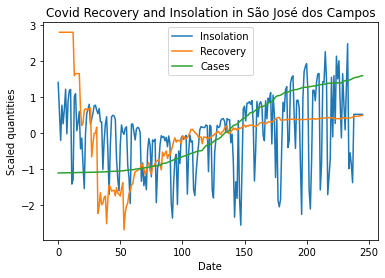

In [28]:
# Plot Covid vs. insolation
plt.figure(num=1, clear=True)
plt.plot(norm_insolation_index, label='insolation')
plt.plot(norm_recov_index, label='covid recovery')
plt.plot(norm_cases_index, label='covid cases')
plt.title('Covid Recovery and Insolation in São José dos Campos')
plt.xlabel('Days since start of pandemic')
plt.ylabel('Scaled quantities')
plt.legend(['Insolation', 'Recovery', 'Cases'])
plt.show()